In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
import zipfile,os

In [16]:
os.listdir('C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/train')    
os.listdir('C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/val')
train_dir = 'images/images/train'
validation_dir = 'C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/val'

In [17]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join('C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/train', 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join('C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/train', 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join('C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/val', 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join('C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/val', 'messy')


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 512)      

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [29]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=15, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/15
25/25 - 4s - loss: 0.8571 - accuracy: 0.4500 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/15
25/25 - 3s - loss: 0.6999 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/15
25/25 - 4s - loss: 0.6904 - accuracy: 0.5700 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 4/15
25/25 - 3s - loss: 0.6793 - accuracy: 0.5400 - val_loss: 0.6591 - val_accuracy: 0.5000
Epoch 5/15
25/25 - 4s - loss: 0.6383 - accuracy: 0.6700 - val_loss: 0.5964 - val_accuracy: 0.6000
Epoch 6/15
25/25 - 4s - loss: 0.6077 - accuracy: 0.7100 - val_loss: 0.6431 - val_accuracy: 0.6500
Epoch 7/15
25/25 - 4s - loss: 0.6510 - accuracy: 0.6900 - val_loss: 0.5709 - val_accuracy: 0.7500
Epoch 8/15
25/25 - 4s - loss: 0.6221 - accuracy: 0.6700 - val_loss: 0.5304 - val_accuracy: 0.8500
Epoch 9/15
25/25 - 4s - loss: 0.5605 - accuracy: 0.7700 - val_loss: 0.5220 - val_accuracy: 0.7500
Epoch 10/15
25/25 - 4s - loss: 0.5811 - accuracy: 0.7100 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 11/15
25/25 -

[[1.]]
clean


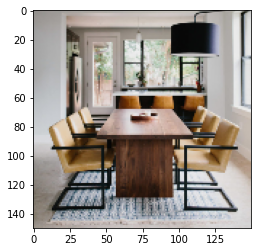

In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = f'C:/Users/Python/Project Jupyther/Belajar/Belajar/images/images/test/3.png'

# predicting images
path = uploaded
img = image.load_img(path, target_size=(150,150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)  
print(classes)
# print(f'{i}.png')
if classes==0:
    print('messy')
else:
    print('clean')